<a href="https://colab.research.google.com/github/kutluhanNG/MachineLearning/blob/main/PCA_with_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


Num TPUs Available: 1


If the autoencoder uses only linear activation functions and the cost function is MSE, then it ends up performing a simple PCA.

In [12]:
encoder = tf.keras.Sequential([tf.keras.layers.Dense(2)])
decoder = tf.keras.Sequential([tf.keras.layers.Dense(3)])

autoencoder = tf.keras.Sequential([encoder, decoder])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.5)
autoencoder.compile(loss="mse", optimizer=optimizer, metrics=["mae"])

In [13]:
import numpy as np

# Parameters
num_samples = 1000  # Number of samples
height = 28         # Height of each sample
width = 28          # Width of each sample
channels = 3        # Number of channels (e.g., RGB)

# Generate synthetic 3D data (e.g., random pixel values between 0 and 1)
X_train = np.random.rand(num_samples, height, width, channels).astype(np.float32)

# Normalize between 0 and 1 (if needed)
X_train /= np.max(X_train)

# Print the shape to verify
print("Shape of X_train:", X_train.shape)


Shape of X_train: (1000, 28, 28, 3)


In [14]:
history = autoencoder.fit(X_train, X_train, epochs=500, verbose=True)
codings = encoder.predict(X_train)

Epoch 1/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.2026 - mae: 0.3320
Epoch 2/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0584 - mae: 0.2016
Epoch 3/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0505 - mae: 0.1860
Epoch 4/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0382 - mae: 0.1602
Epoch 5/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0292 - mae: 0.1364
Epoch 6/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0278 - mae: 0.1321
Epoch 7/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0278 - mae: 0.1320
Epoch 8/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0278 - mae: 0.1318
Epoch 9/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0277 - mae: 0.1318
Epoch 10/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0278 - mae: 0.1319
Epoch 11/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0278 - mae: 0.1319
Epoch 12/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0278 - mae: 0.1321
Epoch 13/500
32/32 ━━━━━━━━━━━━━━━━━

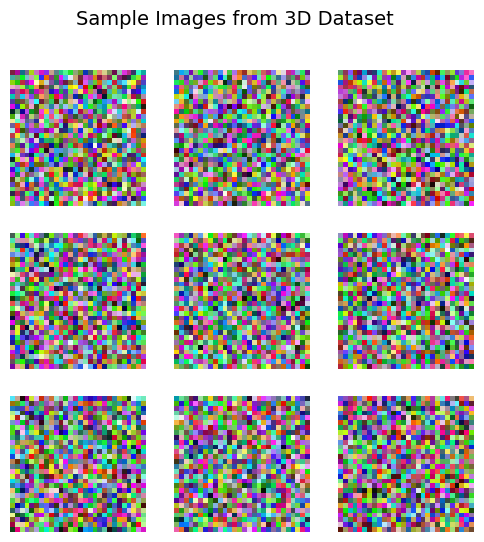

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot a grid of images from the 3D dataset
def plot_3d_dataset(X_train, num_images=9):
    plt.figure(figsize=(6, 6))

    # Randomly select images to display
    indices = np.random.choice(X_train.shape[0], num_images, replace=False)

    for i, idx in enumerate(indices):
        plt.subplot(3, 3, i + 1)
        plt.imshow(X_train[idx])  # Display image
        plt.axis("off")  # Remove axis for cleaner visualization

    plt.suptitle("Sample Images from 3D Dataset", fontsize=14)
    plt.show()

# Call the function to visualize dataset
plot_3d_dataset(X_train)
